In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch import nn, optim
import torch.nn.functional as F
from torchviz import make_dot
from torchinfo import summary

In [20]:
torch.manual_seed(123)

l1 = nn.Linear(1, 1)

print(l1)
print(list(l1.named_parameters()))

Linear(in_features=1, out_features=1, bias=True)
[('weight', Parameter containing:
tensor([[-0.4078]], requires_grad=True)), ('bias', Parameter containing:
tensor([0.0331], requires_grad=True))]


In [33]:
name, tensor = list(l1.named_parameters())[0]
print(name, tensor[0], tensor[0].shape)

weight tensor([-0.4078], grad_fn=<SelectBackward0>) torch.Size([1])


In [41]:
for param in l1.named_parameters():
    print('name:', param[0])
    print('tensor:', param[1])
    print('shape:', param[1].shape)
    print('='*50)

name: weight
tensor: Parameter containing:
tensor([[-0.4078]], requires_grad=True)
shape: torch.Size([1, 1])
name: bias
tensor: Parameter containing:
tensor([0.0331], requires_grad=True)
shape: torch.Size([1])


In [52]:
nn.init.constant_(l1.weight, 2.0)
nn.init.constant_(l1.bias, 1.0)

print(l1.weight)
print(l1.bias)

Parameter containing:
tensor([[2.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


In [70]:
x_np = np.arange(-2, 2.1, 1)
x = torch.tensor(x_np)
print(x)

x = x.view(-1, 1)
print(x)
print(x.shape)

tensor([-2., -1.,  0.,  1.,  2.], dtype=torch.float64)
tensor([[-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.]], dtype=torch.float64)
torch.Size([5, 1])


In [74]:
l2 = nn.Linear(2, 1)
print(l2.weight)
print(l2.bias)

nn.init.constant_(l2.weight, 1.0)
nn.init.constant_(l2.bias, 2.0)

print(l2.weight)
print(l2.bias)

Parameter containing:
tensor([[ 0.2646, -0.6001]], requires_grad=True)
Parameter containing:
tensor([-0.4290], requires_grad=True)
Parameter containing:
tensor([[1., 1.]], requires_grad=True)
Parameter containing:
tensor([2.], requires_grad=True)


In [79]:
x2_np = np.array([[0, 0], [0, 1], [1, 0], [1,1]])
x2 = torch.tensor(x2_np).float()

print(x2_np)
print(x2_np.shape)
print(x2)
print(x2.shape)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
(4, 2)
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
torch.Size([4, 2])


In [84]:
y2 = l2(x2)
print(y2.shape)
print(y2)
print(y2.data)

torch.Size([4, 1])
tensor([[2.],
        [3.],
        [3.],
        [4.]], grad_fn=<AddmmBackward0>)
tensor([[2.],
        [3.],
        [3.],
        [4.]])


In [108]:
l3 = nn.Linear(2, 3)

nn.init.constant_(l3.weight[0,:], 1.0)
nn.init.constant_(l3.weight[1,:], 2.0)
nn.init.constant_(l3.weight[2,:], 3.0)
nn.init.constant_(l3.bias, 2.0)

print(l3.weight)
print(l3.bias)

Parameter containing:
tensor([[1., 1.],
        [2., 2.],
        [3., 3.]], requires_grad=True)
Parameter containing:
tensor([2., 2., 2.], requires_grad=True)


In [110]:
y3 = l3(x2)

print(y3)
print(y3.shape)
print(y3.data)

tensor([[2., 2., 2.],
        [3., 4., 5.],
        [3., 4., 5.],
        [4., 6., 8.]], grad_fn=<AddmmBackward0>)
torch.Size([4, 3])
tensor([[2., 2., 2.],
        [3., 4., 5.],
        [3., 4., 5.],
        [4., 6., 8.]])


In [113]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()

        self.l1 = nn.Linear(n_input, n_output)

    def forward(self, x):
        x1 = self.l1(x)
        return x1
    
inputs = torch.rand(100, 1)
labels1 = torch.rand(100, 1)

print(inputs.shape)
print(labels1.shape)

n_input = 1
n_output = 1
net = Net(n_input, n_output)

torch.Size([100, 1])
torch.Size([100, 1])


In [118]:
print(net)
print()
print(net.l1)
print()
print(net.l1.weight)
print()
print(net.l1.bias)

Net(
  (l1): Linear(in_features=1, out_features=1, bias=True)
)

Linear(in_features=1, out_features=1, bias=True)

Parameter containing:
tensor([[0.3322]], requires_grad=True)

Parameter containing:
tensor([-0.7003], requires_grad=True)


In [119]:
outputs = net(inputs)
print(outputs)

tensor([[-0.4737],
        [-0.4286],
        [-0.5679],
        [-0.6233],
        [-0.4502],
        [-0.4893],
        [-0.5857],
        [-0.4060],
        [-0.6525],
        [-0.5376],
        [-0.3998],
        [-0.4807],
        [-0.6645],
        [-0.5071],
        [-0.5579],
        [-0.4655],
        [-0.4406],
        [-0.6517],
        [-0.5888],
        [-0.3961],
        [-0.6553],
        [-0.5718],
        [-0.5895],
        [-0.5748],
        [-0.5570],
        [-0.4387],
        [-0.4303],
        [-0.5937],
        [-0.5148],
        [-0.6882],
        [-0.5969],
        [-0.5497],
        [-0.5402],
        [-0.5038],
        [-0.5250],
        [-0.5835],
        [-0.4145],
        [-0.5886],
        [-0.4015],
        [-0.4361],
        [-0.5378],
        [-0.5954],
        [-0.4319],
        [-0.5323],
        [-0.6245],
        [-0.4442],
        [-0.5213],
        [-0.3747],
        [-0.6975],
        [-0.4936],
        [-0.6859],
        [-0.6081],
        [-0.

In [120]:
criterion = nn.MSELoss()

In [127]:
loss = criterion(outputs, labels1)
print(loss)
print(loss.item())

tensor(1.1199, grad_fn=<MseLossBackward0>)
1.1198569536209106


In [ ]:
loss.backward()

In [134]:
print(net.l1.weight.grad)
print(net.l1.bias.grad)

tensor([[-0.9550]])
tensor([-2.0268])


In [135]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep='\s+',
                     skiprows=22, header=None)
print(raw_df.head(10))

          0      1      2    3      4      5     6       7    8      9     10
0    0.00632  18.00   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3
1  396.90000   4.98  24.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   NaN
2    0.02731   0.00   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8
3  396.90000   9.14  21.60  NaN    NaN    NaN   NaN     NaN  NaN    NaN   NaN
4    0.02729   0.00   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8
5  392.83000   4.03  34.70  NaN    NaN    NaN   NaN     NaN  NaN    NaN   NaN
6    0.03237   0.00   2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7
7  394.63000   2.94  33.40  NaN    NaN    NaN   NaN     NaN  NaN    NaN   NaN
8    0.06905   0.00   2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7
9  396.90000   5.33  36.20  NaN    NaN    NaN   NaN     NaN  NaN    NaN   NaN


In [136]:
x_org = np.hstack([raw_df.values[::2, :],
                   raw_df.values[1::2, :2]])

In [146]:
yt = raw_df.values[1::2, 2]

feature_names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
                          'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT'])

print('원본 데이터', x_org.shape, yt.shape)
print('항목명:', feature_names)

원본 데이터 (506, 13) (506,)
항목명: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [148]:
print(x_org[:5])
feature_names == 'RM'

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]


array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False])

In [153]:
x = x_org[:, feature_names == 'RM']
print(x.shape)
print(x[:5, :])
print()

print(yt.shape)
print(yt[:5])

(506, 1)
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]

(506,)
[24.  21.6 34.7 33.4 36.2]


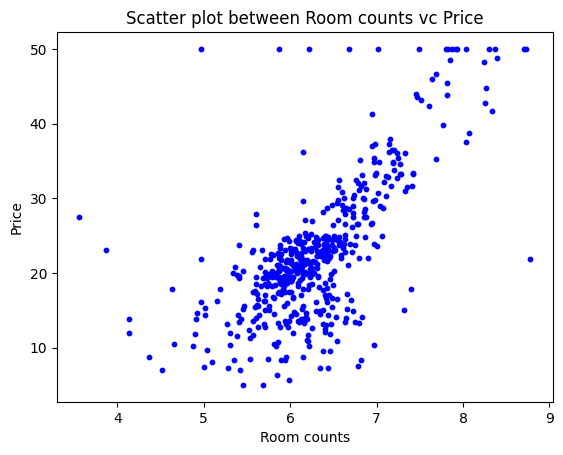

In [154]:
plt.scatter(x, yt, s=10, c='b')
plt.xlabel('Room counts')
plt.ylabel('Price')
plt.title('Scatter plot between Room counts vc Price')
plt.show()

In [159]:
n_input = x.shape[1]

n_output = 1

print(f'n_input {n_input}, n_output {n_output}')

class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)

    def forward(self, x):
        x1 = self.l1(x)
        return x1

n_input 1, n_output 1


In [168]:
print(net)

Net(
  (l1): Linear(in_features=1, out_features=1, bias=True)
)


In [183]:
net = Net(n_input, n_output)
for parameter in net.named_parameters():
    print(f"변수명: {parameter[0]}")
    print(f"변수값: {parameter[1].data}")
    print('='*50)

for parameter in net.parameters():
    print(parameter)

변수명: l1.weight
변수값: tensor([[0.7622]])
변수명: l1.bias
변수값: tensor([0.4928])
Parameter containing:
tensor([[0.7622]], requires_grad=True)
Parameter containing:
tensor([0.4928], requires_grad=True)


In [185]:
from torchinfo import summary

summary(net, (1,), device='cpu')

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       2
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [186]:
criterion = nn.MSELoss()
lr = 0.01
optimizer = optim.SGD(net.parameters(), lr=lr)

In [193]:
inputs = torch.tensor(x, dtype=torch.float32)
labels = torch.tensor(yt, dtype=torch.float32)

print(inputs.shape, inputs.dtype)
print(labels.shape, labels.dtype)

torch.Size([506, 1]) torch.float32
torch.Size([506]) torch.float32


In [194]:
labels1 = labels.view((-1, 1))

print(labels1.shape)

torch.Size([506, 1])


In [201]:
outputs = net(inputs)
print(outputs.shape)
print(outputs.dtype)

loss = criterion(outputs, labels1)
print('loss :', loss.item())

torch.Size([506, 1])
torch.float32
loss : 375.41815185546875


In [203]:
dict(net.named_parameters())

{'l1.weight': Parameter containing:
 tensor([[0.7622]], requires_grad=True),
 'l1.bias': Parameter containing:
 tensor([0.4928], requires_grad=True)}

In [ ]:
from torchviz import make_dot

g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [206]:
outputs = net(inputs)

loss = criterion(outputs, labels1)

loss.backward()

print('net.l1.weight.grad', net.l1.weight.grad)
print('net.l1.bias.grad', net.l1.bias.grad)

optimizer.step()

print('net.l1.weight', net.l1.weight)
print('net.l1.bias', net.l1.bias)

optimizer.zero_grad()

print('net.l1.weight.grad', net.l1.weight.grad)
print('net.l1.bias.grad', net.l1.bias.grad)

net.l1.weight.grad tensor([[-225.0330]])
net.l1.bias.grad tensor([-34.4992])
net.l1.weight Parameter containing:
tensor([[3.0126]], requires_grad=True)
net.l1.bias Parameter containing:
tensor([0.8378], requires_grad=True)
net.l1.weight.grad None
net.l1.bias.grad None


In [207]:
lr = 0.01
net = Net(n_input, n_output)
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
num_epochs = 50000
history = np.zeros((0, 2))

In [208]:
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels1) / 2.0
    loss.backward()
    optimizer.step()

    if (epoch%10 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f"Epoch:{epoch} loss:{loss.item():.5f}")

Epoch:0 loss:223.47902
Epoch:10 loss:29.38417
Epoch:20 loss:29.36086
Epoch:30 loss:29.34270
Epoch:40 loss:29.32458
Epoch:50 loss:29.30651
Epoch:60 loss:29.28848
Epoch:70 loss:29.27050
Epoch:80 loss:29.25256
Epoch:90 loss:29.23465
Epoch:100 loss:29.21679
Epoch:110 loss:29.19898
Epoch:120 loss:29.18121
Epoch:130 loss:29.16348
Epoch:140 loss:29.14580
Epoch:150 loss:29.12815
Epoch:160 loss:29.11055
Epoch:170 loss:29.09299
Epoch:180 loss:29.07548
Epoch:190 loss:29.05800
Epoch:200 loss:29.04057
Epoch:210 loss:29.02318
Epoch:220 loss:29.00583
Epoch:230 loss:28.98852
Epoch:240 loss:28.97125
Epoch:250 loss:28.95403
Epoch:260 loss:28.93685
Epoch:270 loss:28.91971
Epoch:280 loss:28.90260
Epoch:290 loss:28.88554
Epoch:300 loss:28.86852
Epoch:310 loss:28.85155
Epoch:320 loss:28.83461
Epoch:330 loss:28.81771
Epoch:340 loss:28.80086
Epoch:350 loss:28.78404
Epoch:360 loss:28.76727
Epoch:370 loss:28.75053
Epoch:380 loss:28.73384
Epoch:390 loss:28.71718
Epoch:400 loss:28.70057
Epoch:410 loss:28.68400
Ep

In [210]:
print(history[0, 1])
print(history[-1, 1])

223.47901916503906
21.800321578979492


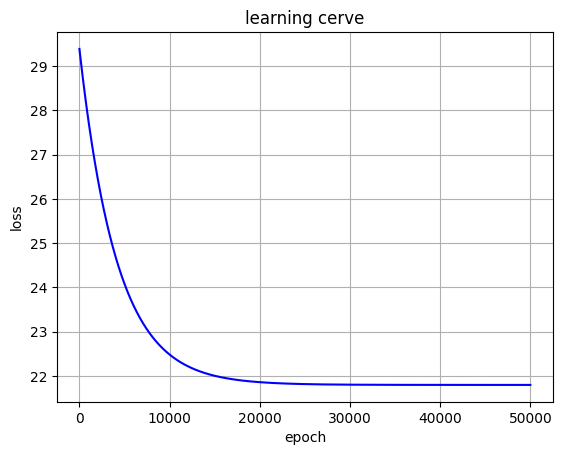

In [217]:
plt.plot(history[1:, 0], history[1:, 1], 'b')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('learning cerve')
plt.grid()
plt.show()

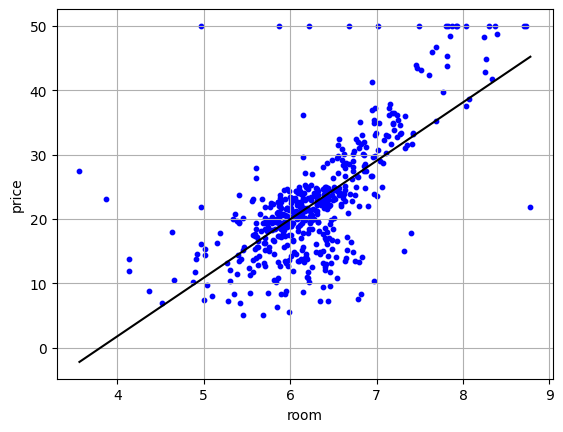

In [224]:
xse = np.array((x.min(), x.max())).reshape(-1, 1)
Xse = torch.tensor(xse).float()

with torch.no_grad():
    Yse = net(Xse)

plt.scatter(x, yt, s=10, c='b')
plt.xlabel('room')
plt.ylabel('price')
plt.plot(Xse, Yse, c='k')
plt.grid()
plt.show()

In [230]:
x_add = x_org[: , feature_names == "LSTAT"]
x2 = np.hstack((x, x_add))

print(x2.shape)
print(x2[:5, :])

(506, 2)
[[6.575 4.98 ]
 [6.421 9.14 ]
 [7.185 4.03 ]
 [6.998 2.94 ]
 [7.147 5.33 ]]


In [231]:
n_input = x2.shape[1]
print(n_input)

net = Net(n_input, n_output)

2


In [233]:
for parameter in net.named_parameters():
    print(parameter[0])
    print(parameter[1].data)
    print('='*50)

l1.weight
tensor([[ 0.2922, -0.0016]])
l1.bias
tensor([0.3929])


In [234]:
from torchinfo import summary
summary(net, (2,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       3
Total params: 3
Trainable params: 3
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [241]:
inputs = torch.tensor(x2, dtype=torch.float32)

lr = 0.0001

net = Net(n_input, n_output)

criterion = nn.MSELoss()

optimizer = optim.SGD(net.parameters(), lr=lr)

num_epochs = 10000

history = np.zeros((0, 2))

In [242]:
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels1) / 2.0
    loss.backward()
    optimizer.step()

    if (epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f"Epoch {epoch} loss {loss.item()}")

Epoch 0 loss 617.4462890625
Epoch 100 loss 138.734130859375
Epoch 200 loss 111.66514587402344
Epoch 300 loss 92.64704895019531
Epoch 400 loss 77.39735412597656
Epoch 500 loss 65.15296936035156
Epoch 600 loss 55.321533203125
Epoch 700 loss 47.42749786376953
Epoch 800 loss 41.089073181152344
Epoch 900 loss 35.99973678588867
Epoch 1000 loss 31.913314819335938
Epoch 1100 loss 28.632183074951172
Epoch 1200 loss 25.997636795043945
Epoch 1300 loss 23.882272720336914
Epoch 1400 loss 22.183761596679688
Epoch 1500 loss 20.8199520111084
Epoch 1600 loss 19.72490692138672
Epoch 1700 loss 18.845674514770508
Epoch 1800 loss 18.139699935913086
Epoch 1900 loss 17.57284927368164
Epoch 2000 loss 17.117700576782227
Epoch 2100 loss 16.752241134643555
Epoch 2200 loss 16.458799362182617
Epoch 2300 loss 16.223180770874023
Epoch 2400 loss 16.033994674682617
Epoch 2500 loss 15.88209056854248
Epoch 2600 loss 15.760119438171387
Epoch 2700 loss 15.662191390991211
Epoch 2800 loss 15.583556175231934
Epoch 2900 loss 

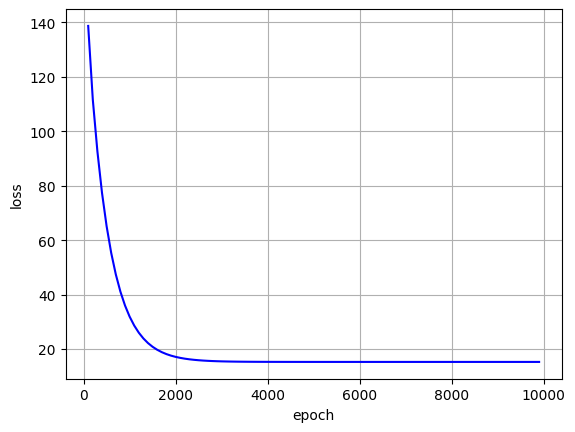

In [244]:
plt.plot(history[1:, 0], history[1:, 1], 'b')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.show()